255 0
255.0 1.0
253.5 1.8125
250.765625 2.890625


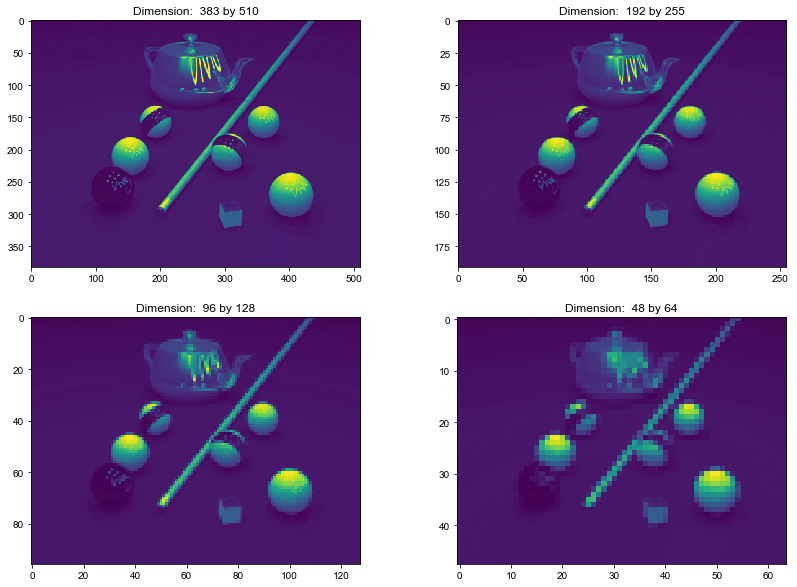

In [108]:
import numpy as np
import pywt
import imageio
import pylab as P

_method = 'haar'

im = imageio.imread('pool.png')
im0 = im[:,:,0]

plt.figure(figsize = (14,10))

ax = plt.subplot(221)
P.imshow(im0)
P.title("Dimension:  %d by %d" % (im0.shape[0],im0.shape[1]))

print im0.max(), im0.min()
for n in np.arange(3):
    coeffs = pywt.dwt2(im0, _method)
    cA, (cH, cV, cD) = coeffs
    ax = plt.subplot(222+n)
    dd = cA/(2**(n+1))
    P.imshow(dd)
    P.title("Dimension:  %d by %d" % (dd.shape[0],dd.shape[1]))
    print dd.max(), dd.min()
    im0 = cA

P.show()


    



1 29.0419 -33.9325
2 27.4231 -28.5548
3 23.8061 -27.9159


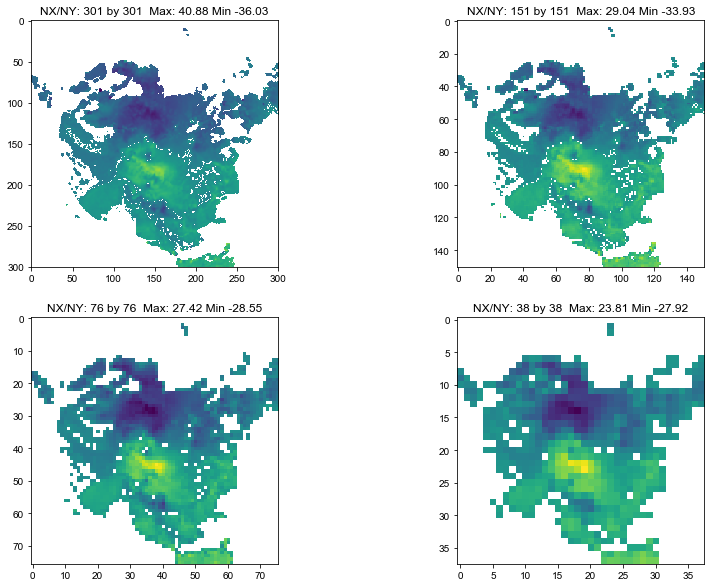

In [134]:

_method = 'haar'

im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/opaws_files/obs_seq_KDDC2_0160525_001527_V06.nc")
data = (im.variables['VEL'][0]).filled(0.0)

arr = data

# arr = np.pad(arr, (90, 89), 'reflect')
# print arr.shape

plt.figure(figsize = (14,10))

ax = plt.subplot(221)
P.imshow(np.ma.masked_array(data, np.abs(data) < 0.5))
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (data.shape[0], data.shape[1], data.max(), data.min()))

for n in np.arange(3):
    coeffs = pywt.dwt2(arr, _method)
    cA, (cH, cV, cD) = coeffs
    ax = plt.subplot(222+n)
    dd = (cA/(2**(n+1)))
    P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5))
    P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))
    arr = cA
    print n+1, dd.max(), dd.min()
    
P.show()

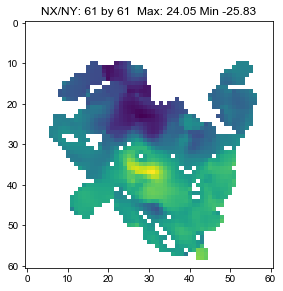

In [128]:
im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/KDDC/opaws_files/obs_seq_KDDC2_0160525_001527_V06.nc")
dd   = (im.variables['VEL'][0]).filled(0.0)
plt.figure(figsize = (14,10))

ax = plt.subplot(221)
P.imshow(np.ma.masked_array(dd, np.abs(dd) < 0.5))
P.title("NX/NY: %d by %d  Max: %4.2f Min %4.2f" % (dd.shape[0], dd.shape[1], dd.max(), dd.min()))
P.show()

(320, 320)
40.8809 -36.0259 40.8809 -36.0259
-----------------------------
Approximation 431.491 0.906688
 Horizontal detail 90.9435 -86.483
Vertical detail 121.868 -125.668
Diagonal detail 67.7744 -67.7744
-----------------------------
Approximation 852.269 81.8642
 Horizontal detail 200.869 -153.795
Vertical detail 185.602 -169.891
Diagonal detail 109.72 -97.8054
-----------------------------
Approximation 1649.89 212.452
 Horizontal detail 232.578 -268.611
Vertical detail 233.141 -217.41
Diagonal detail 169.618 -176.839
-----------------------------
Approximation 3053.46 566.279
 Horizontal detail 447.091 -435.172
Vertical detail 425.255 -424.916
Diagonal detail 279.584 -269.888


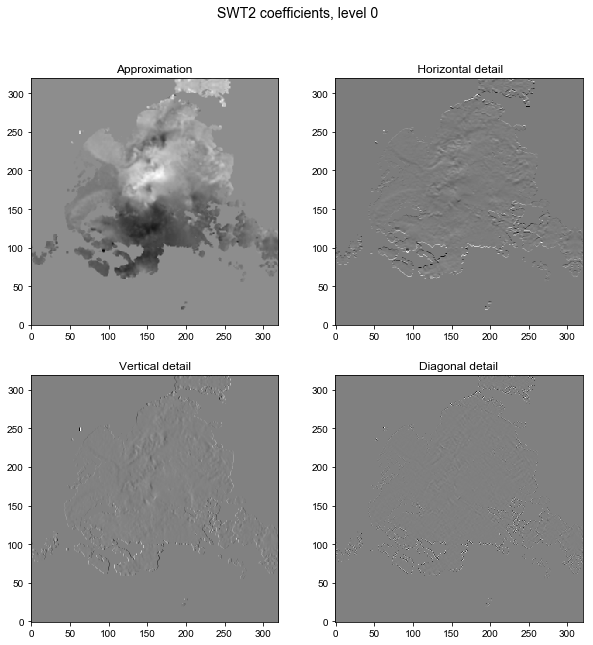

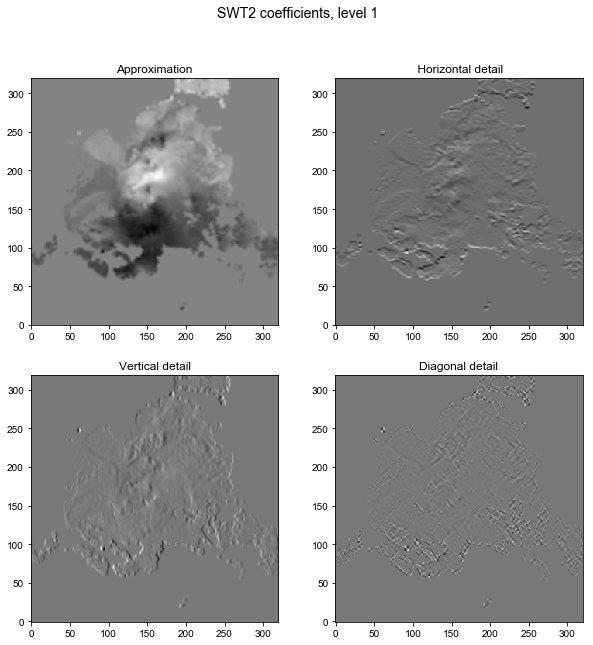

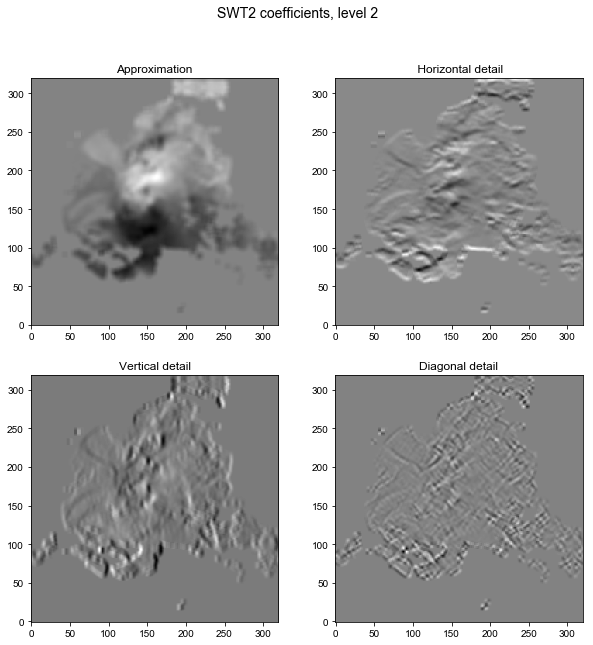

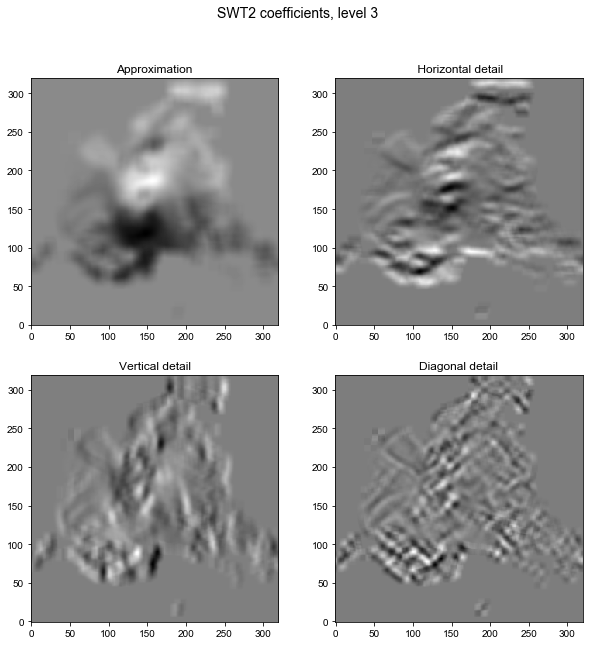

In [103]:
import numpy as np
import matplotlib.pyplot as plt

from pywt import WaveletPacket2D, dwt2, wavedec
import pywt.data


im   = ncdf.Dataset("/Users/Louis.Wicker/pyOPAWS/opaws_files/obs_seq_KDDC2_0160525_001527_V06.nc")
data = (im.variables['VEL'][0]).filled(0.0)

arr = 255 * (data - data.min()) / (data.max() - data.min())

fac = (data.max() - data.min()) / 255.0

arr = np.pad(arr, (10, 9), 'reflect')
print arr.shape

print data.max(), data.min(), (fac*arr + data.min()).max(), (fac*arr + data.min()).min()
level = 0
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for LL, (LH, HL, HH) in pywt.swt2(arr, 'haar', level=4, start_level=0):
    fig = plt.figure(figsize=(10,10))
    print("-----------------------------")
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        print titles[i], a.max(), a.min()
        ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=12)

    fig.suptitle("SWT2 coefficients, level %s" % level, fontsize=14)
    level += 1

plt.show()